#PRACTICAL QUESTIONS


In [1]:
#1. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy (Iris):", accuracy_score(y_test, y_pred))


Accuracy (Iris): 1.0


In [2]:
#2.  Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
#compare their accuracies


wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
acc_linear = accuracy_score(y_test, clf_linear.predict(X_test))

# RBF SVM
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
acc_rbf = accuracy_score(y_test, clf_rbf.predict(X_test))

print("Linear SVM Accuracy:", acc_linear)
print("RBF SVM Accuracy:", acc_rbf)


Linear SVM Accuracy: 1.0
RBF SVM Accuracy: 0.8055555555555556


In [3]:
#3. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
#Squared Error (MSE):

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (SVR):", mse)


Mean Squared Error (SVR): 1.3320115421348744


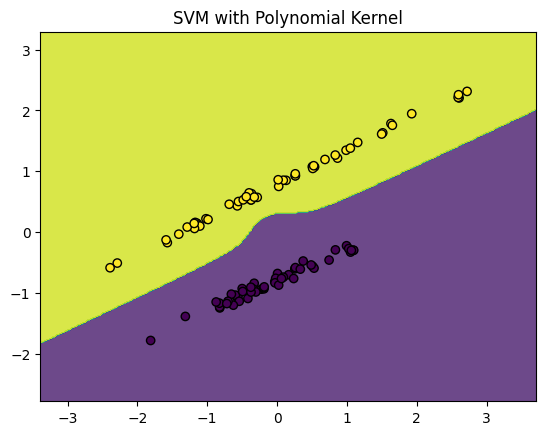

In [5]:
#4. : Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
#boundary:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# Load dataset (2D for visualization)
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                     n_clusters_per_class=1, n_samples=100, random_state=42)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot decision boundary
def plot_decision_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("SVM with Polynomial Kernel")
    plt.show()

plot_decision_boundary(clf, X, y)

In [6]:
#5. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
#evaluate accuracy:

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Accuracy (GaussianNB):", accuracy_score(y_test, y_pred))


Accuracy (GaussianNB): 0.9736842105263158


In [7]:
#6. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
#Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy (MultinomialNB):", accuracy_score(y_test, y_pred))


Accuracy (MultinomialNB): 0.9671985815602837


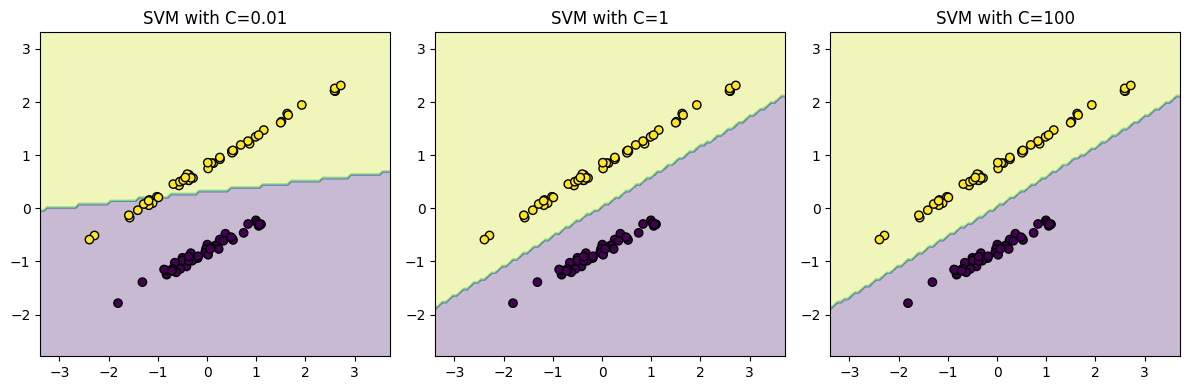

In [8]:
#7. Write a Python program to train an SVM Classifier with different C values and compare the decision
#boundaries visually=

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=100, random_state=42)
X = StandardScaler().fit_transform(X)

Cs = [0.01, 1, 100]
plt.figure(figsize=(12, 4))
for i, C in enumerate(Cs, 1):
    clf = SVC(C=C, kernel='linear')
    clf.fit(X, y)

    # Plotting
    plt.subplot(1, 3, i)
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"SVM with C={C}")
plt.tight_layout()
plt.show()


In [9]:
#8. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
#binary features=

from sklearn.naive_bayes import BernoulliNB

# Generating synthetic binary features
X = np.random.randint(0, 2, (1000, 10))
y = np.random.randint(0, 2, 1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Evaluate
y_pred = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred))


BernoulliNB Accuracy: 0.52


In [10]:
#9. Write a Python program to apply feature scaling before training an SVM model and compare results with
#unscaled data=

X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
clf_unscaled = SVC()
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = SVC()
clf_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)


Accuracy without scaling: 0.8055555555555556
Accuracy with scaling: 1.0


In [11]:
#10. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
#after Laplace Smoothing=

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer


X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standard GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc_normal = accuracy_score(y_test, gnb.predict(X_test))

# Laplace Smoothing (for continuous data not standard, but simulating with variance adjustment)
gnb_smooth = GaussianNB(var_smoothing=1e-1)
gnb_smooth.fit(X_train, y_train)
acc_smooth = accuracy_score(y_test, gnb_smooth.predict(X_test))

print("Accuracy without smoothing:", acc_normal)
print("Accuracy with Laplace smoothing:", acc_smooth)


Accuracy without smoothing: 0.958041958041958
Accuracy with Laplace smoothing: 0.9230769230769231


In [12]:
#11.  Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
#gamma, kernel)=

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9327635327635327


In [13]:
#12. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
#check it improve accuracy=

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model_default = SVC()
model_default.fit(X_train, y_train)
print("Without Class Weight:\n", classification_report(y_test, model_default.predict(X_test)))

# With class weighting
model_weighted = SVC(class_weight='balanced')
model_weighted.fit(X_train, y_train)
print("With Class Weight:\n", classification_report(y_test, model_weighted.predict(X_test)))


Without Class Weight:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       224
           1       0.71      0.46      0.56        26

    accuracy                           0.92       250
   macro avg       0.82      0.72      0.76       250
weighted avg       0.92      0.92      0.92       250

With Class Weight:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       224
           1       0.50      0.73      0.59        26

    accuracy                           0.90       250
   macro avg       0.73      0.82      0.77       250
weighted avg       0.92      0.90      0.90       250



In [14]:
#13. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data=

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dummy email dataset
emails = ["Free money now!!!", "Hi friend, how are you?", "Lowest prices for meds", "Hello, just checking in", "Win a free ticket"]
labels = [1, 0, 1, 0, 1]  # 1 = spam, 0 = ham

# Vectorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Spam Detection Accuracy:", accuracy_score(y_test, y_pred))


Spam Detection Accuracy: 0.5


In [15]:
#14.  Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
#compare their accuracy=

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, svm.predict(X_test))

# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = accuracy_score(y_test, nb.predict(X_test))

print("SVM Accuracy:", acc_svm)
print("Naïve Bayes Accuracy:", acc_nb)


SVM Accuracy: 0.951048951048951
Naïve Bayes Accuracy: 0.958041958041958


In [16]:
#15. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
#results=

from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without feature selection
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_full = accuracy_score(y_test, nb.predict(X_test))

# With feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
nb_sel = GaussianNB()
nb_sel.fit(X_train_sel, y_train)
acc_sel = accuracy_score(y_test, nb_sel.predict(X_test_sel))

print("Full Features Accuracy:", acc_full)
print("Selected Features Accuracy:", acc_sel)


Full Features Accuracy: 1.0
Selected Features Accuracy: 0.9333333333333333


In [17]:
#16. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
#strategies on the Wine dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC


X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# OvR
ovr_model = OneVsRestClassifier(SVC())
ovr_model.fit(X_train, y_train)
acc_ovr = accuracy_score(y_test, ovr_model.predict(X_test))

# OvO
ovo_model = OneVsOneClassifier(SVC())
ovo_model.fit(X_train, y_train)
acc_ovo = accuracy_score(y_test, ovo_model.predict(X_test))

print("OvR Accuracy:", acc_ovr)
print("OvO Accuracy:", acc_ovo)


OvR Accuracy: 0.7111111111111111
OvO Accuracy: 0.7777777777777778


In [18]:
#17.  Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
#Cancer dataset and compare their accuracy=

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"{kernel.capitalize()} Kernel Accuracy:", acc)


Linear Kernel Accuracy: 0.958041958041958
Poly Kernel Accuracy: 0.9440559440559441
Rbf Kernel Accuracy: 0.951048951048951


In [19]:
#18. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
#average accuracy=

from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

X, y = load_wine(return_X_y=True)
skf = StratifiedKFold(n_splits=5)
clf = SVC(kernel='linear')

scores = cross_val_score(clf, X, y, cv=skf)
print("Stratified K-Fold Scores:", scores)
print("Average Accuracy:", scores.mean())


Stratified K-Fold Scores: [0.88888889 0.94444444 0.97222222 1.         1.        ]
Average Accuracy: 0.961111111111111


In [20]:
#19. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
#performance=

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Uniform priors
nb_uniform = GaussianNB(priors=[1/3, 1/3, 1/3])
nb_uniform.fit(X_train, y_train)
acc_uniform = accuracy_score(y_test, nb_uniform.predict(X_test))

# Learned priors
nb_learned = GaussianNB()
nb_learned.fit(X_train, y_train)
acc_learned = accuracy_score(y_test, nb_learned.predict(X_test))

print("Accuracy with Uniform Priors:", acc_uniform)
print("Accuracy with Learned Priors:", acc_learned)


Accuracy with Uniform Priors: 1.0
Accuracy with Learned Priors: 1.0


In [21]:
#20. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
#compare accuracy=

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Full model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
acc_full = accuracy_score(y_test, clf.predict(X_test))

# RFE
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
rfe.fit(X_train, y_train)
acc_rfe = accuracy_score(y_test, rfe.predict(X_test))

print("Accuracy without RFE:", acc_full)
print("Accuracy with RFE:", acc_rfe)


Accuracy without RFE: 0.958041958041958
Accuracy with RFE: 0.9790209790209791


In [22]:
#21. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
#F1-Score instead of accuracy=

from sklearn.metrics import precision_score, recall_score, f1_score

# Assumi9ng model and predictions are from previous example
y_pred = clf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.9560439560439561
Recall: 0.9775280898876404
F1-Score: 0.9666666666666667


In [25]:
#22. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
#(Cross-Entropy Loss)=

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

# Probabilistic predictions from the Naïve Bayes model trained on Wine data
y_prob = nb.predict_proba(X_test)

print("Log Loss (Cross-Entropy):", log_loss(y_test, y_prob))

print("Accuracy:", accuracy_score(y_test, nb.predict(X_test)))

Log Loss (Cross-Entropy): 0.012097034816195484
Accuracy: 1.0


In [27]:
#23.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn=

from sklearn.metrics import log_loss

# Probabilistic predictions from earlier Naïve Bayes model
y_prob = nb.predict_proba(X_test)
print("Log Loss (Cross-Entropy):", log_loss(y_test, y_prob))



Log Loss (Cross-Entropy): 0.012097034816195484


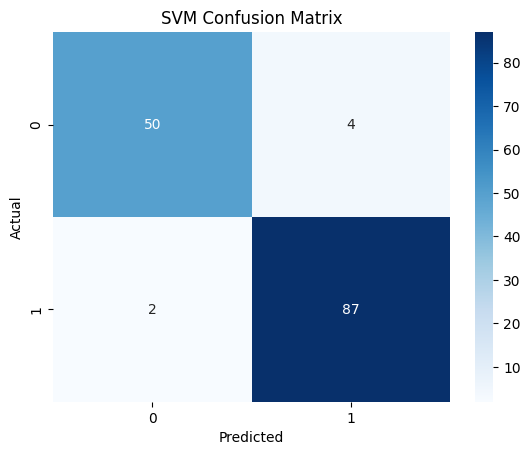

In [30]:
#23.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn=

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer # Import the necessary dataset
from sklearn.svm import SVC # Import SVC

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = SVC(kernel='linear') # You can choose the kernel you prefer
clf.fit(X_train, y_train)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
#25. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
#score=

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("Mean Absolute Error (SVR):", mean_absolute_error(y_test, y_pred))


Mean Absolute Error (SVR): 0.8674205743031635


In [32]:
#26. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

# For binary classification
y_prob = nb.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.9935497295047857
